In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
import numpy as np

In [2]:
from keras.models import model_from_json
# load json and create model
json_file = open('/home/madhumadi/sd/srcnn_tjf_ds_full_elevation_1_e_1000/srcnn_pred_srcnn_tjf_ds_full_elevation_1_e_1000_16_06.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/home/madhumadi/sd/srcnn_tjf_ds_full_elevation_1_e_1000/srcnn_weights_srcnn_tjf_ds_full_elevation_1_e_1000_16_06.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error',optimizer='adam')

Using TensorFlow backend.


Loaded model from disk


In [3]:

data_size=-1 #train+test
batch_size=100 # Size of each batch
n_epochs=1000
use_elevation=1
patience=100
if data_size== -1:
    ds='full'
else:
    ds=data_size


In [4]:
import xarray as xr
y=xr.open_dataset('/home/madhumadi/sd/nc_files/obs_1920_to_2005_no_leap.nc')['precipitation (mm)'].fillna(0)


In [5]:
model=xr.open_dataset('/home/madhumadi/sd/nc_files/no_ties_bcsd_output.nc')['observation'].fillna(0)

In [9]:
model.shape

(31390, 117, 118)

In [10]:
mask=xr.where(xr.open_dataset('nc_files/obs_1920_to_2005_no_leap.nc')['precipitation (mm)'][0]>=0,1,np.nan)

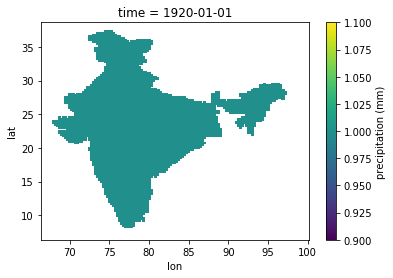

In [11]:
mask.plot()

In [12]:
temp=model.interp_like(mask)

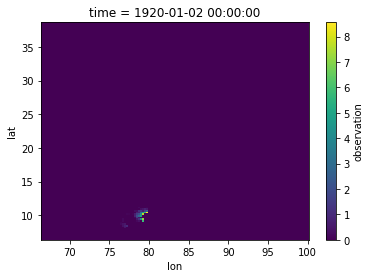

In [13]:
temp[1].fillna(0).plot()

In [14]:

x=temp.fillna(0)
train_images=np.asarray(x)

In [16]:
train_images[0].shape

(129, 135)

In [18]:

if use_elevation==1:
    import xarray as xr
    from numpy import *
    a='/home/madhumadi/sd/nc_files/india_masked_ele_interp.nc'
    elevation=xr.open_dataset(a)
    elevation_temp2=elevation.interp(lon=np.arange(66.5,100.0,0.25), lat=np.arange(6.5,38.5,0.25))

    felev_temp=np.asarray(elevation_temp2['Band1']).reshape([128,134])

    def fill_na(x, fillval=0):
        where_are_NaNs = isnan(x)
        x[where_are_NaNs] = fillval
        return x
    felev_te=fill_na(felev_temp)
    felev=((felev_te-np.min(felev_te))/(np.max(felev_te)-np.min(felev_te)))

    train_images.shape
    p1=[]
    for i in range(len(train_images)):
        p2=np.asarray([train_images[i,0:128,0:134],felev*50])
        p1.append(p2)
    p3=np.asarray(p1)
    print(p3.shape)
    resu=p3.transpose(0,2,3,1)


(31390, 2, 128, 134)


In [19]:
resu.shape

(31390, 128, 134, 2)

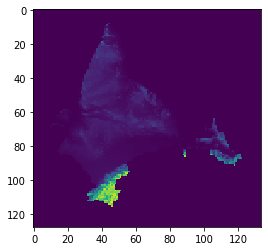

In [22]:
import pylab as plt
plt.imshow(resu[0,:,:,1])

In [23]:
predictions=loaded_model.predict(resu)

In [58]:
mask=xr.where(y[0]>=0,1,np.nan)

In [59]:
mask.shape

(129, 135)

In [39]:
temp[:,0:128,0:134]=predictions

In [60]:
temp2=temp.reshape([-1,129,135])*np.asarray(mask)

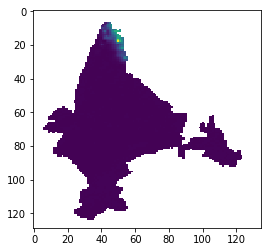

In [61]:
plt.imshow(temp2[0])

In [69]:
yac['tj_cnn']=(('time','lat','lon'),temp2)

In [72]:
fin=yac.drop('precipitation (mm)')

In [73]:
fin

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 31390)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2005-12-31
Data variables:
    tj_cnn   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [77]:
fin.clip(min=0).to_netcdf('tj_cnn_prediction.nc')

In [78]:
ak=xr.open_dataset('tj_cnn_prediction.nc')

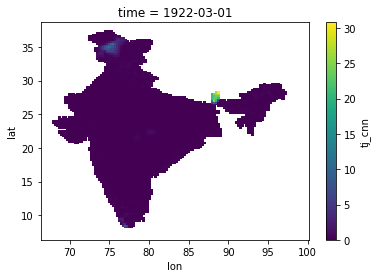

In [84]:
ak['tj_cnn'][789].plot()

In [68]:
yac

<xarray.Dataset>
Dimensions:             (lat: 129, lon: 135, time: 31390)
Coordinates:
  * lat                 (lat) float64 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * lon                 (lon) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * time                (time) datetime64[ns] 1920-01-01 ... 2005-12-31
Data variables:
    precipitation (mm)  (time, lat, lon) float32 ...

In [67]:
yac=xr.open_dataset('obs_1920_to_2005_no_leap.nc')

In [26]:
y.shape

(31390, 129, 135)

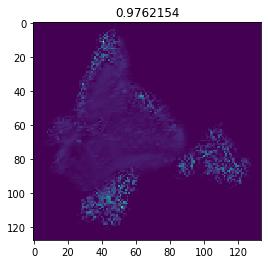

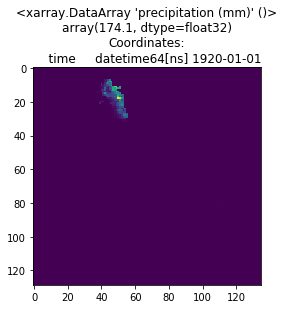

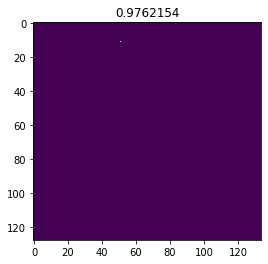

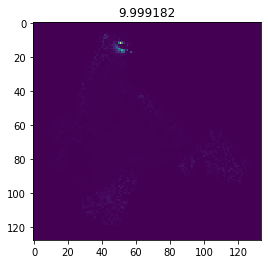

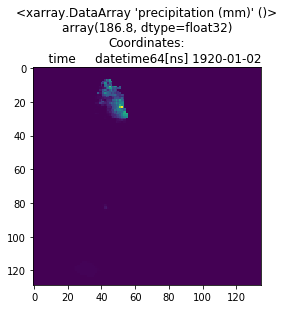

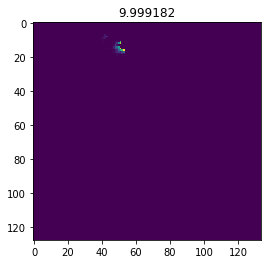

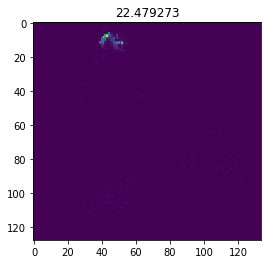

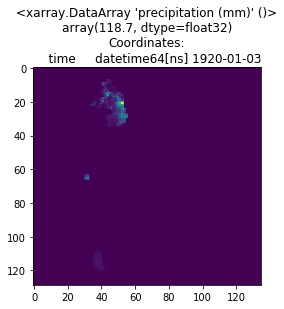

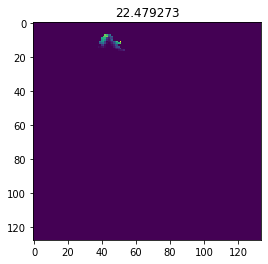

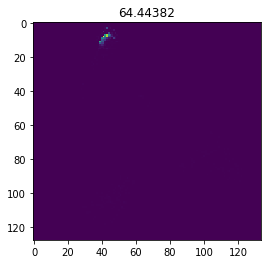

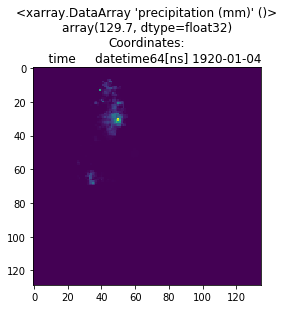

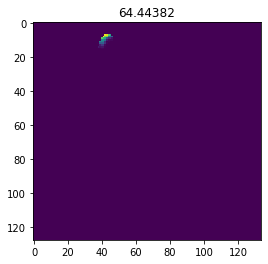

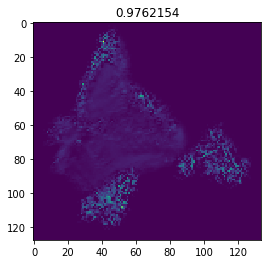

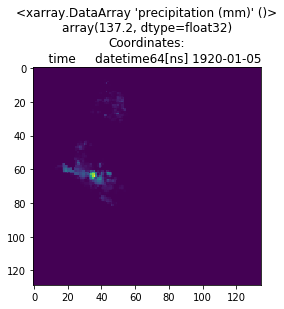

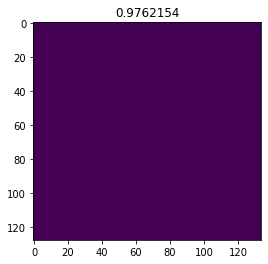

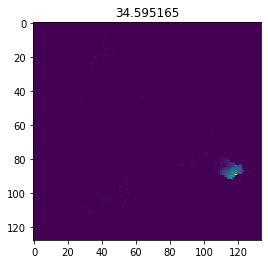

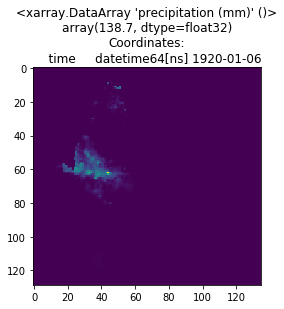

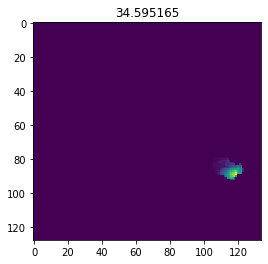

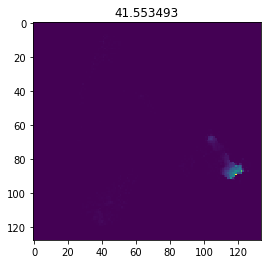

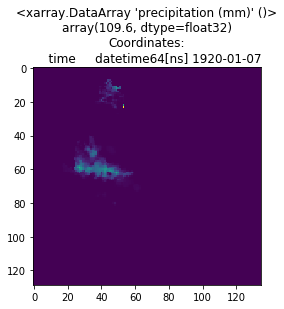

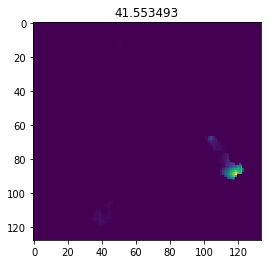

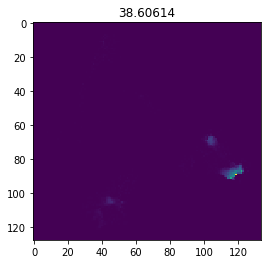

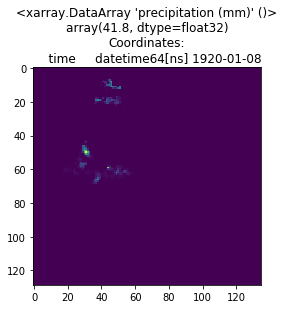

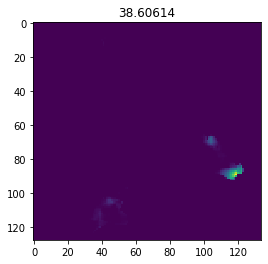

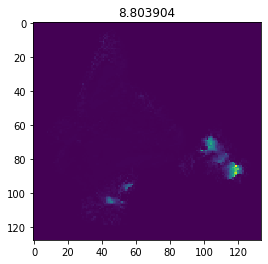

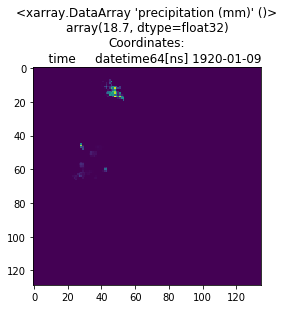

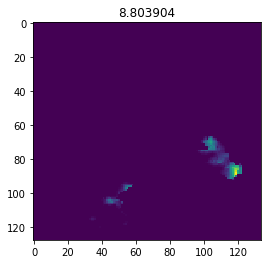

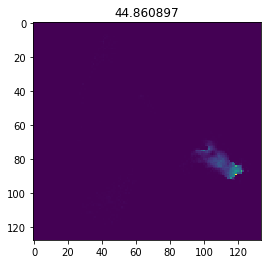

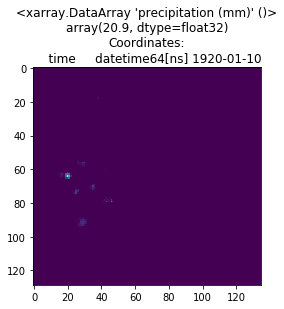

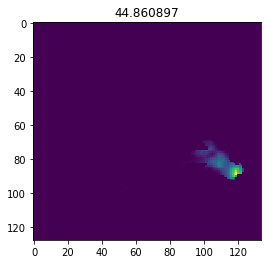

In [31]:
for i in range(10):
    plt.imshow(predictions[i,:,:,0],vmin=0)
    plt.title(np.max(predictions[i,:,:,0]))
    plt.show()
    plt.imshow(y[i,:,:])
    plt.title(np.max(y[i,:,:]))
    plt.show()
    plt.title(np.max(y[i,:,:]))
    plt.title(np.max(predictions[i,:,:,0]))
    plt.imshow(resu[i,:,:,0])

    plt.show()

In [48]:
xf.reshape(-1,129*135).shape

(393, 17415)

In [49]:
time_steps=30

In [32]:
predictions.shape

(31390, 128, 134, 1)

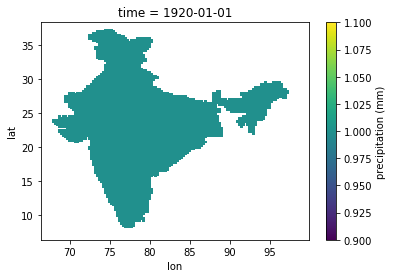

In [46]:
mask[0:128,0:134].plot()

In [45]:
xr_object['tj_weights_CESM_bcsd'].max()

<xarray.DataArray 'tj_weights_CESM_bcsd' ()>
array(1868.0228, dtype=float32)

In [37]:
predict=predictions.reshape([-1,128,134])
print('saving')
xr_object = xr.Dataset({"tj_weights_CESM_bcsd": (('time', 'lat', 'lon'), predict)},coords={"lat": np.arange(6.5,38.5,0.25), "lon":np.arange(66.5,100.0,0.25), "time": xr.cftime_range('1920-01-01','2005-12-31', calendar='noleap')})



saving


In [39]:
xr_object.to_netcdf('/home/madhumadi/sd/tj_weights_CESM_bcsd.nc')

In [ ]:
xr_object.to_netcdf('/home/madhumadi/sd/nc_files/divya_bcsd_bcsrcnn.nc')

In [48]:
masked_xr=xr_object*mask[0:128,0:134]

In [54]:
masked_xr['tj_weights_CESM_bcsd'].clip(0).to_netcdf('/home/madhumadi/sd/tj_weights_CESM_bcsd_n.nc')